## PPO with Vanilla Policy Gradient Loss

In this notebook, we demonstrate our PPO implementation using policy gradient loss without the generalized advantage function.

In [1]:
import gym
import numpy as np
import tensorflow as tf
from PPO import PPOAgent
import time
import matplotlib.pyplot as plt

from Modules import policy_gradient_loss

Set USING_CUSTOM_ENVIRONMENT to `True` if you want to use the environment provided by the professor, and `False` if you want to use Pendulum-v1 from OpenAI Gym. I think the only difference is that Pendulum-v1 stops after 200 timesteps while the environment provided by the professor does not have a limit.

In [2]:
USING_CUSTOM_ENVIRONMENT = False

if USING_CUSTOM_ENVIRONMENT:
    from a3_gym_env.envs.pendulum import CustomPendulumEnv
    env = CustomPendulumEnv()
else:
    env = gym.make('Pendulum-v1')

These are the hyperparameters that we're using. They are very arbitrary, and because our implementation of PPO is slow and we didn't have enough time to find ideal hyperparameters.

In [3]:
input_size = 3
action_size = 1

loss_function = policy_gradient_loss
log_std = .01
learning_rate=1e-3
gamma = .99

total_timesteps = 20000
batch_size = 5
trajectory_length = 100
train_iterations = total_timesteps // (batch_size * trajectory_length)
log_interval = train_iterations // 2 # this lets us visualize the value function

## Training the Agent

Now, we can create the PPO agent and start training it. This will take a while, especially as the loss function becomes more complex.

iteration: 0, loss: [[-88890.02]]


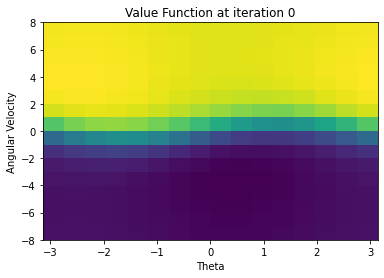

iteration: 1, loss: [[-96597.516]]


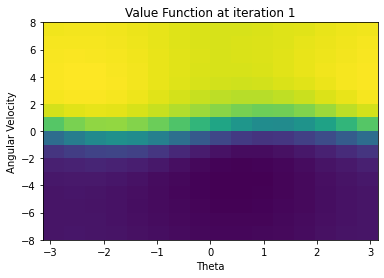

In [4]:
agent = PPOAgent(input_size=input_size, output_size=action_size, log_std=log_std, num_trajectories=batch_size, trajectory_length=trajectory_length, learning_rate=learning_rate)

agent.train(env=env, max_iterations=train_iterations, log_interval=log_interval)

Now that the agent is trained, we can plot the reward-to-go and loss during the agent's training. The x-axis of each plot represents the iteration that the PPO algorithm was on, not the timestep in the environment.

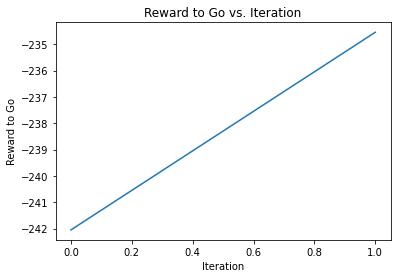

In [5]:
iterations = np.arange(train_iterations)
plt.plot(iterations, agent.rewards)
plt.xlabel('Iteration')
plt.ylabel('Reward to Go')
plt.title('Reward to Go vs. Iteration')
plt.show()

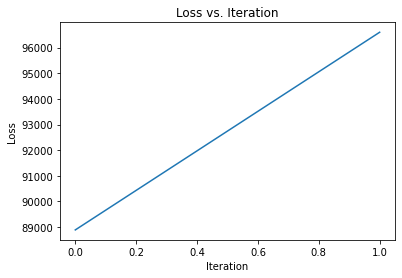

In [6]:
iterations = np.arange(0, len(agent.losses), log_interval)
plt.plot(iterations, agent.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iteration')
plt.show()